<a href="https://colab.research.google.com/github/VenenAlex/Work/blob/main/Real_Estate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [ ]:
dataset = pd.read_csv('Bengaluru_House_Data.csv')
d1 = dataset.drop(['area_type','availability','society','balcony'],axis=1)
print(d1)

                       location       size total_sqft  bath   price
0      Electronic City Phase II      2 BHK       1056   2.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                      Kothanur      2 BHK       1200   2.0   51.00
...                         ...        ...        ...   ...     ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00
13316             Richards Town      4 BHK       3600   5.0  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00
13319              Doddathoguru      1 BHK        550   1.0   17.00

[13320 rows x 5 columns]


In [ ]:

# # Convert location column to string and handle missing values
# d1['location'] = d1['location'].astype(str).fillna('Unknown')

# # Extract unique locations, sorted alphabetically
# locations = sorted(d1['location'].unique())

In [ ]:
# Ensure the 'location' column has only string values
d1['location'] = d1['location'].apply(lambda x: str(x) if not pd.isnull(x) else 'Unknown')

# Filter out any numeric values accidentally cast as strings
d1 = d1[d1['location'].apply(lambda x: not x.replace('.', '', 1).isdigit())]

# Extract unique locations, sorted alphabetically
locations = sorted(d1['location'].unique())

## Checking NULL values

In [ ]:
d1.isnull().sum()

,0
location,0
size,16
total_sqft,0
bath,73
price,0


In [ ]:
d2 = d1.dropna()
d2.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
d2['bhk'] = d2['size'].apply(lambda x: int(x.split(' ')[0]))
d2.head()

<ipython-input-7-c385813cf01c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['bhk'] = d2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


## Correcting Total Square Feet

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
d2[~d2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_sqft_to_num(x):
    token=x.split('-')
    if(len(token)==2):
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
d3 = d2.copy()
d3.total_sqft = d3.total_sqft.apply(convert_sqft_to_num)
d3 = d3[d3.total_sqft.notnull()]
d3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [ ]:
d3.loc[30]

,30
location,Yelahanka
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


## Adding anew Column "Price per Sqft"

In [ ]:
d3['Price_per_sqft'] = d3['price']*100000/d3['total_sqft']
d3.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
len(d3.location.unique())

1299

## Reducing the number of locations

In [ ]:
d3.location = d3.location.apply(lambda x: x.strip())
location_stats = d3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,533
Sarjapur Road,392
Electronic City,304
Kanakpura Road,264
Thanisandra,235
...,...
Kanakapura Road,1
1 Giri Nagar,1
Kanakapura main Road,1


## Dimensionality Reduction

In [ ]:
locations_lessthan_10 = location_stats[location_stats<=10]
locations_lessthan_10

,location
location,
Dodsworth Layout,10
Sector 1 HSR Layout,10
BTM 1st Stage,10
Gunjur Palya,10
Dairy Circle,10
...,...
Kanakapura Road,1
1 Giri Nagar,1
Kanakapura main Road,1


In [ ]:
len(d3.location.unique())

1288

In [ ]:
d3.location = d3.location.apply(lambda x:'Other' if x in locations_lessthan_10 else x)
len(d3.location.unique())

241

In [ ]:
d3.shape

(13201, 7)

## Removing Outliers using Business Logic

Removing suspicious outlier

In [ ]:
d4 = d3[~(d3.total_sqft/d3.bhk<300 )]
d4.shape

(12457, 7)

In [ ]:
d4.Price_per_sqft.describe()

,Price_per_sqft
count,12457.000000
mean,6308.427888
std,4167.968413
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


Removing Price per sqft outliers

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [ ]:
d5 = remove_pps_outliers(d4)
d5.shape

(10243, 7)

Visualizing Data using Scatter Plot

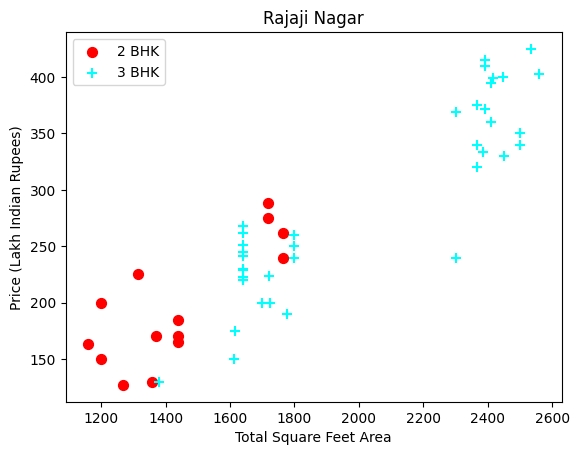

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='red',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='cyan',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(d5,"Rajaji Nagar")

Removing BHK Outlier

In [ ]:
def remove_bhk_outliers(df):
    excluded = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_sqft),
                'std': np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                excluded = np.append(excluded, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(excluded,axis='index')
d6 = remove_bhk_outliers(d5)
d6.shape

(7318, 7)

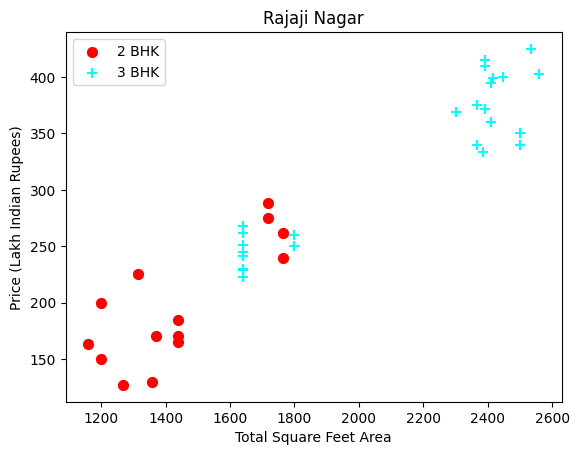

In [ ]:
plot_scatter_chart(d6,"Rajaji Nagar")

Removing Bathroom Outliers

In [ ]:
d6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
d6[d6.bath>10]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5927,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
6016,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6750,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
7081,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [ ]:
d6[d6.bath>d6.bhk+2]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5852,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9018,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [ ]:
d7 = d6[d6.bath<d6.bhk+2]
d7.shape

(7240, 7)

In [ ]:
d8 = d7.drop(['size','Price_per_sqft'],axis='columns')
d8.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [ ]:
d8 = d8[[col for col in d8.columns if col != 'price'] + ['price']]

In [ ]:
d8.to_csv(r'd8_dataset.csv', index=False)

## Creating a Model

In [ ]:
d8

,location,total_sqft,bath,bhk,price
0,1st Block Jayanagar,2850.0,4.0,4,428.0
1,1st Block Jayanagar,1630.0,3.0,3,194.0
2,1st Block Jayanagar,1875.0,2.0,3,235.0
3,1st Block Jayanagar,1200.0,2.0,3,130.0
4,1st Block Jayanagar,1235.0,2.0,2,148.0
...,...,...,...,...,...
10232,Yeshwanthpur,1195.0,2.0,2,100.0
10233,Yeshwanthpur,1692.0,3.0,3,108.0
10235,Yeshwanthpur,2500.0,5.0,6,185.0
10240,Yeshwanthpur,1855.0,3.0,3,135.0


In [ ]:
#d8 = d8.drop(d8[d8['location'] == 'Other'].index, axis=0)

In [ ]:
len(d8.loc[d8['location']=='Other'])

1127

In [ ]:
boolean = pd.get_dummies(d8.location)
boolean.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
d9 = pd.concat([d8,boolean.drop('Other',axis='columns')],axis='columns')
d9.head()

,location,total_sqft,bath,bhk,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,4,428.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,3,194.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,3,235.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,3,130.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,2,148.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
d9 = d9.drop('location',axis='columns')
d9.head(2)

,total_sqft,bath,bhk,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,428.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,194.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = d9.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y = d9.price
y.head(3)

,price
0,428.0
1,194.0
2,235.0


In [ ]:
print(X)

       total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0          2850.0   4.0    4                 True               False   
1          1630.0   3.0    3                 True               False   
2          1875.0   2.0    3                 True               False   
3          1200.0   2.0    3                 True               False   
4          1235.0   2.0    2                 True               False   
...           ...   ...  ...                  ...                 ...   
10232      1195.0   2.0    2                False               False   
10233      1692.0   3.0    3                False               False   
10235      2500.0   5.0    6                False               False   
10240      1855.0   3.0    3                False               False   
10241      1876.0   3.0    3                False               False   

       2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          False           

In [ ]:
print(y)

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232    100.0
10233    108.0
10235    185.0
10240    135.0
10241    160.0
Name: price, Length: 7240, dtype: float64


In [ ]:
print(X)

       total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0          2850.0   4.0    4                 True               False   
1          1630.0   3.0    3                 True               False   
2          1875.0   2.0    3                 True               False   
3          1200.0   2.0    3                 True               False   
4          1235.0   2.0    2                 True               False   
...           ...   ...  ...                  ...                 ...   
10232      1195.0   2.0    2                False               False   
10233      1692.0   3.0    3                False               False   
10235      2500.0   5.0    6                False               False   
10240      1855.0   3.0    3                False               False   
10241      1876.0   3.0    3                False               False   

       2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          False           

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

## Random Forest Regression

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators=500,random_state=0)
# regressor.fit(X_train,y_train)

### Multiple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.to_numpy().reshape(len(y_test),1)),1))

[[ 47.08  46.17]
 [ 68.23  75.  ]
 [ 76.51  54.  ]
 ...
 [ 58.42  65.12]
 [ 75.04  85.  ]
 [135.89 120.  ]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8565989637939588

In [ ]:
import numpy as np

def price_predictor(location, sqft, bath, bhk):
    """Predicts the price of a house based on location, sqft, bath, and bhk.

    Args:
        location (str): The location of the house.
        sqft (int): The square footage of the house.
        bath (int): The number of bathrooms in the house.
        bhk (int): The number of bedrooms in the house.

    Returns:
        float: The predicted price of the house.
    """
    try:
        loc_index = np.where(X.columns == location)[0][0]
    except IndexError:
        # Handle the case where the location is not found in the columns
        loc_index = -1  # or some other value to indicate it's not found
        print(f"Location '{location}' not found in the dataset.")

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    # Only set the location feature if it's found
    if loc_index >= 0:
        x[loc_index] = 1

    return regressor.predict([x])[0]

In [ ]:
price_predictor('Electronic City Phase II',850, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


63.46984381406169

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85, 0.84, 0.84, 0.86, 0.82])

In [ ]:
import pickle
with open('banglore_home_prices_model.pkl','wb') as f:
    pickle.dump(regressor,f)

In [ ]:
import json
# Assuming 'df' is your original Pandas DataFrame
# before converting to a NumPy array:
# X = df.values  # This converts the DataFrame to a NumPy array

# Now, to get the column names, use df.columns:
columns = {
    'data_columns' : [col.lower() for col in d8.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))